#  LBL H2O B09 cosz0.5 mls75 (181025)

### Input Parameter Options

    H2O Band 9 (8200 - 14290)
    cosz = 0.5
    rsfc = 0.0
    vstar = 8200
    nband = 609
    nv = 10000
    dv = 0.001
    ng = 10
    nref = 2
    p_refs = / 300, 300 /
    t_refs = / 250, 250 /
    ng_refs = / 4, 6 /   <- note: changed (3,7) to (4,6) 
    ng_adju = / -3, 0 /
    data wgt / 0.95, 0.90, 5*0.50, 0.70, 0.85, 0.95 / 
    option_klin = 1
    option_k_lookup = 0 <- note: interpolation with ktable, 0 no, 1 yes
    klin = 3.0e-25
    include 'mls75.pro'
    nl = 0
    nt = 0

### Note
    Work_SW_single_18-10-08.f
    CLIRAD_h2o_co2_ktable_181013r8.f
    All variables were changed real*8 type 

    lbl <- line
    lblg <- weighting with wgt, absmean, absmeanlog
    lblk <- interpolation with ktable
    flux_all <- lbl, lblg, lblk for each ig + each total 
    heat_all <- lbl, lblg, lblk for each ig + each total 


In [1]:
import numpy as np
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

path = 'cosz0.5/mls/'
fname = 'h2o_b09_cz0.5_mls75_181025_'

### Flux

In [18]:
fluxs = pd.read_table(path+'flux_all.dat',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                      names=['hPa','LBL_g1','LBLg_g1','LBLk_g1','LBL_g2','LBLg_g2','LBLk_g2','LBL_g3','LBLg_g3','LBLk_g3'
                            ,'LBL_g4','LBLg_g4','LBLk_g4','LBL_g5','LBLg_g5','LBLk_g5','LBL_g6','LBLg_g6','LBLk_g6'
                            ,'LBL_g7','LBLg_g7','LBLk_g7','LBL_g8','LBLg_g8','LBLk_g8','LBL_g9','LBLg_g9','LBLk_g9'
                            ,'LBL_g10','LBLg_g10','LBLk_g10'
                            ,'LBL_tot','LBLg_tot','LBLk_tot'])

In [3]:
## save flux data to excel
sav = pd.DataFrame(fluxs)
sav.to_csv(fname+"flux_all.csv",header=True,index=True)
fn = fname+'flux_all.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### Figures

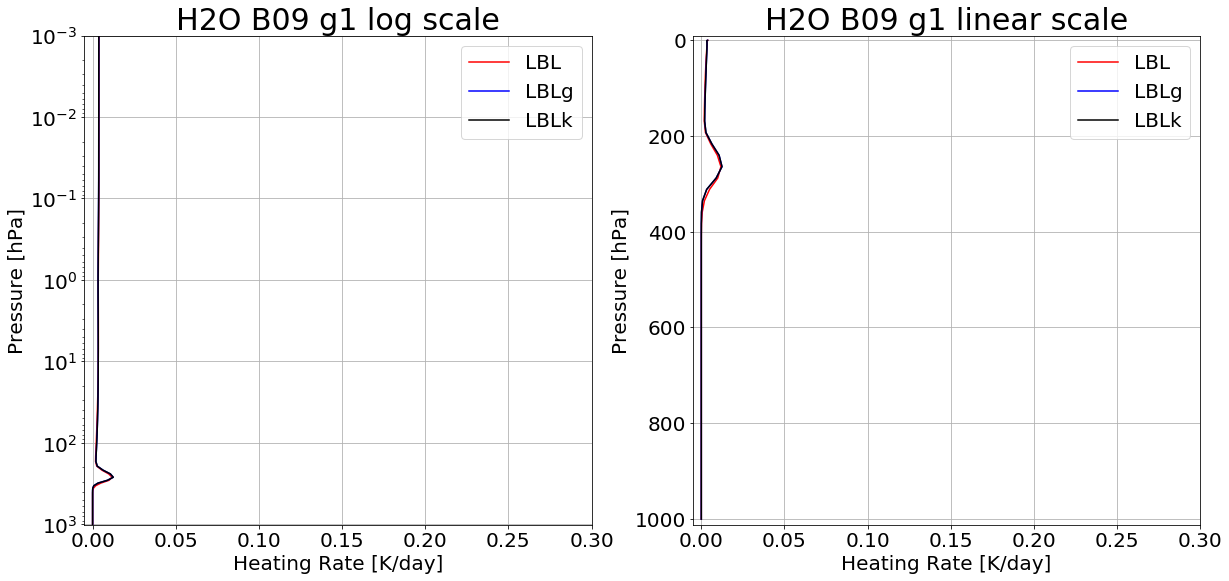

In [34]:
htr = pd.read_table(path+'heat_all.dat',header=None,sep="\s+",keep_default_na=False,
                      names=['hPa','LBL_g1','LBLg_g1','LBLk_g1','LBL_g2','LBLg_g2','LBLk_g2','LBL_g3','LBLg_g3','LBLk_g3'
                            ,'LBL_g4','LBLg_g4','LBLk_g4','LBL_g5','LBLg_g5','LBLk_g5','LBL_g6','LBLg_g6','LBLk_g6'
                            ,'LBL_g7','LBLg_g7','LBLk_g7','LBL_g8','LBLg_g8','LBLk_g8','LBL_g9','LBLg_g9','LBLk_g9'
                            ,'LBL_g10','LBLg_g10','LBLk_g10'
                            ,'LBL_tot','LBLg_tot','LBLk_tot'])

params = {'figure.figsize': (20,9),'legend.fontsize': 20,'axes.labelsize': 20,'axes.titlesize': 30,'xtick.labelsize': 20,'ytick.labelsize': 20}
plt.rcParams.update(params)

# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g1 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g1'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g1'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g1 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g1'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g1'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

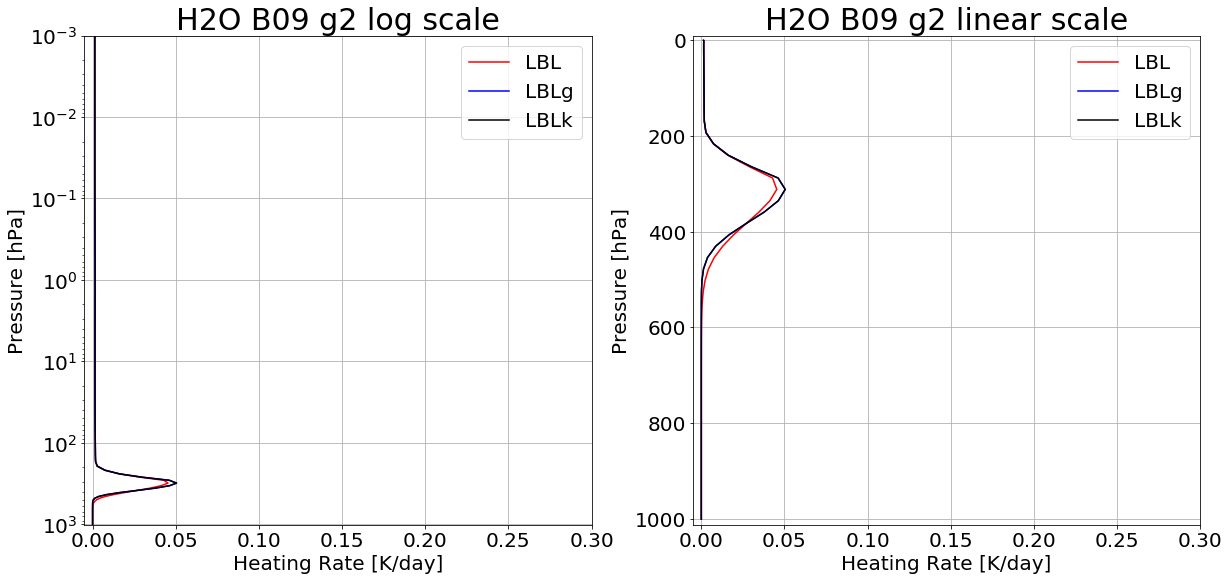

In [35]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g2 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g2'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g2'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g2 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g2'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g2'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

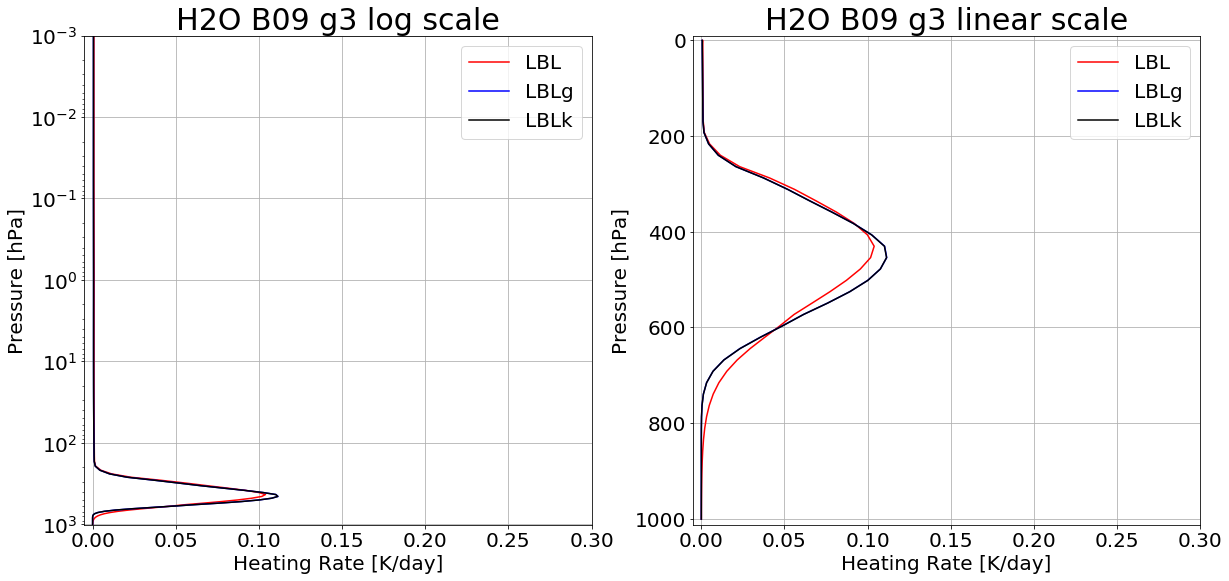

In [36]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g3 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g3'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g3'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g3 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g3'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g3'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

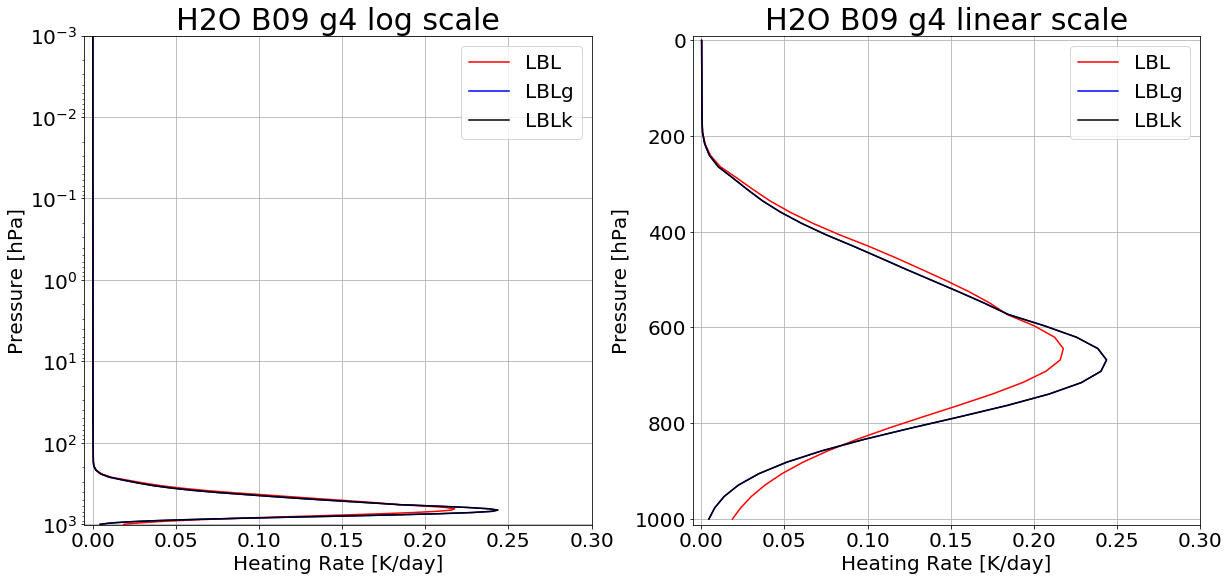

In [37]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g4 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g4'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g4'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g4 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g4'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g4'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

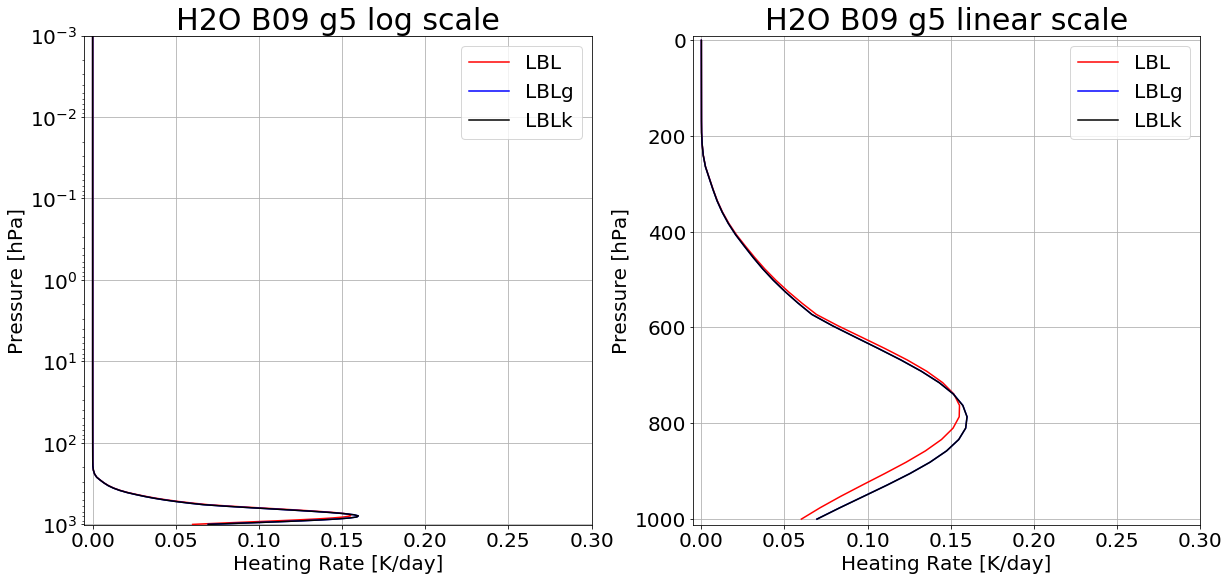

In [38]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g5 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g5'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g5'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g5 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g5'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g5'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

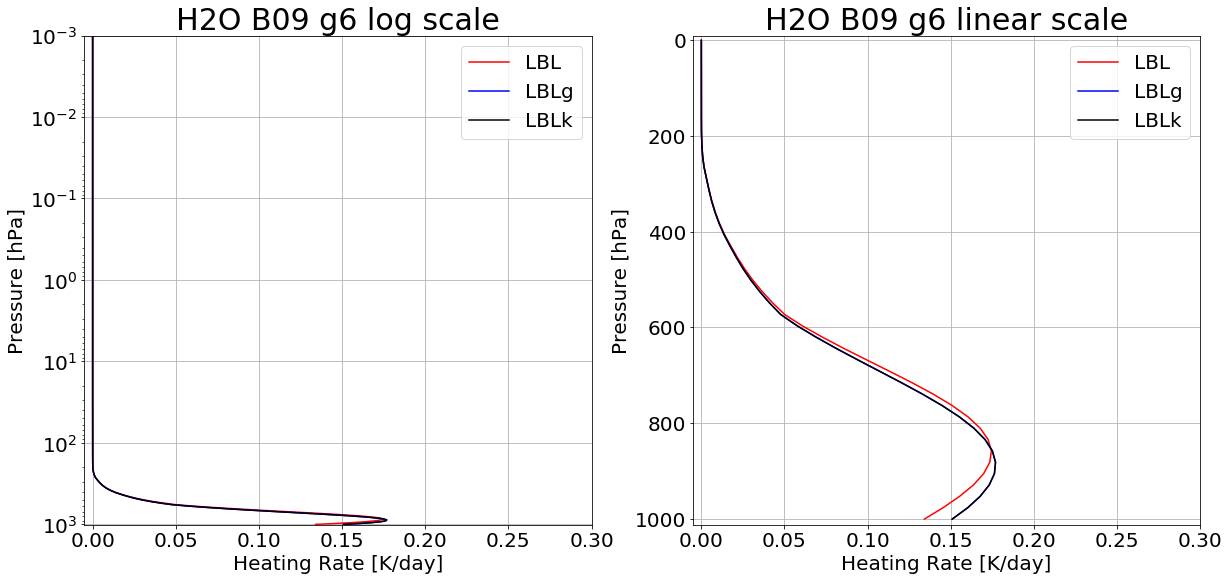

In [39]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g6 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g6'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g6'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g6 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g6'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g6'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

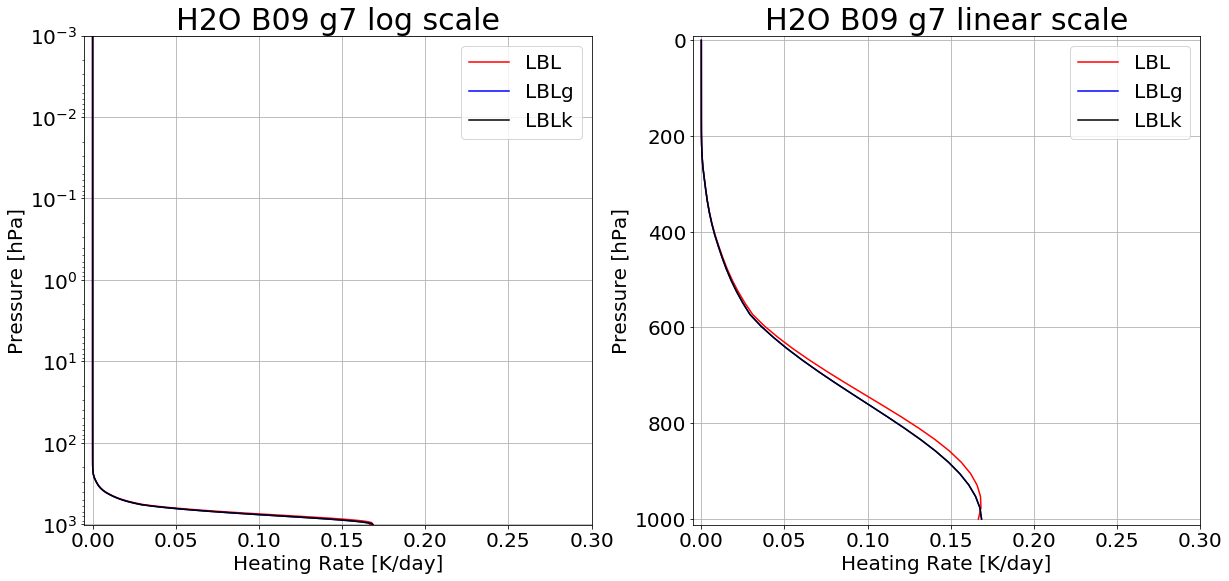

In [40]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g7 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g7'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g7'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g7'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g7 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g7'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g7'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g7'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

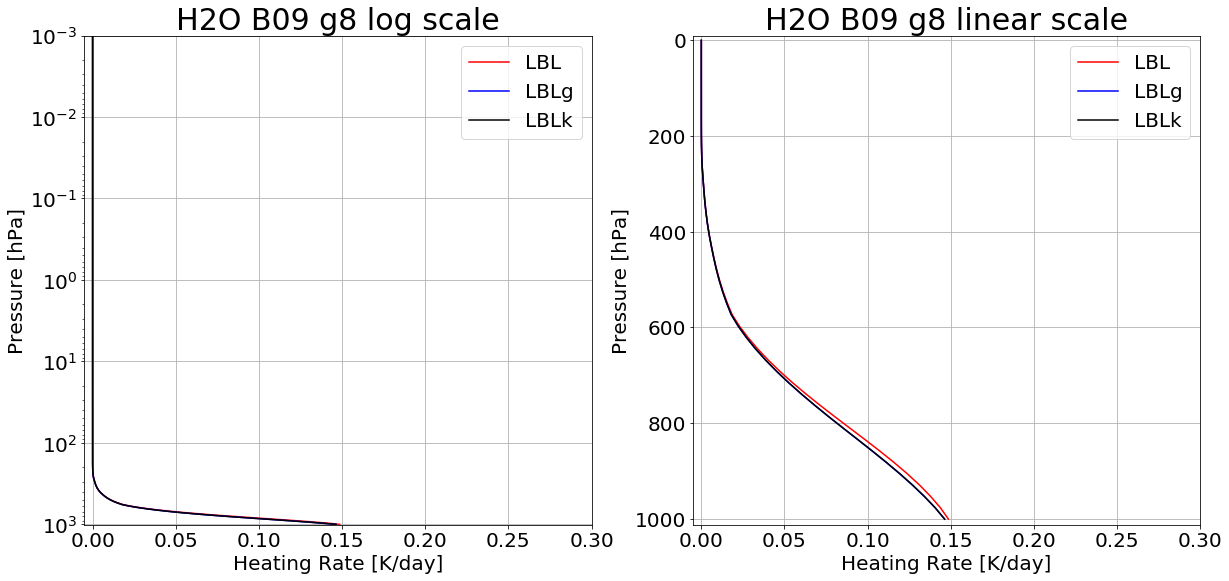

In [41]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g8 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g8'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g8'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g8'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g8 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g8'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g8'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g8'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

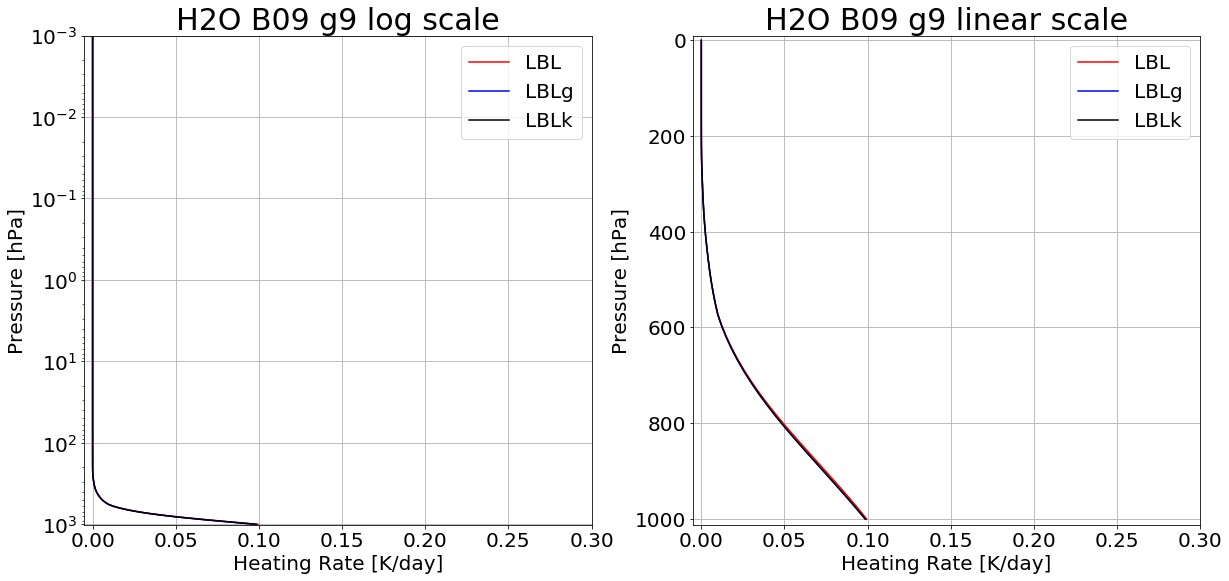

In [42]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g9 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g9'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g9'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g9'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g9 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g9'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g9'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g9'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

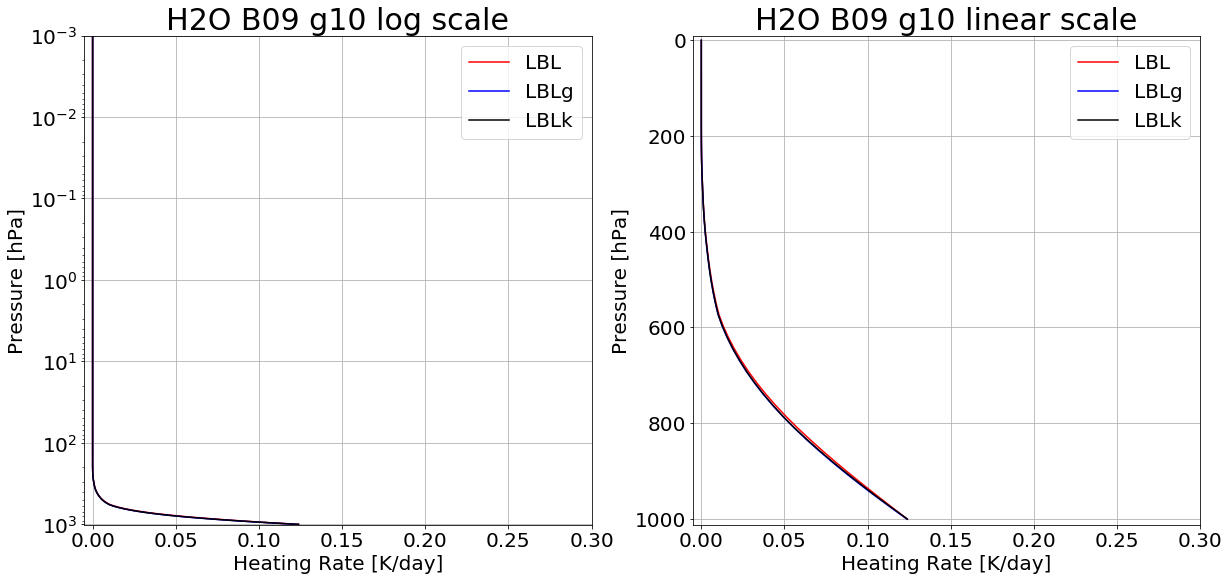

In [43]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.3,1013,0.001])
plt.grid()
plt.title('H2O B09 g10 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g10'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g10'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g10'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.3,1013,-10])
plt.grid()
plt.title('H2O B09 g10 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g10'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g10'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_g10'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

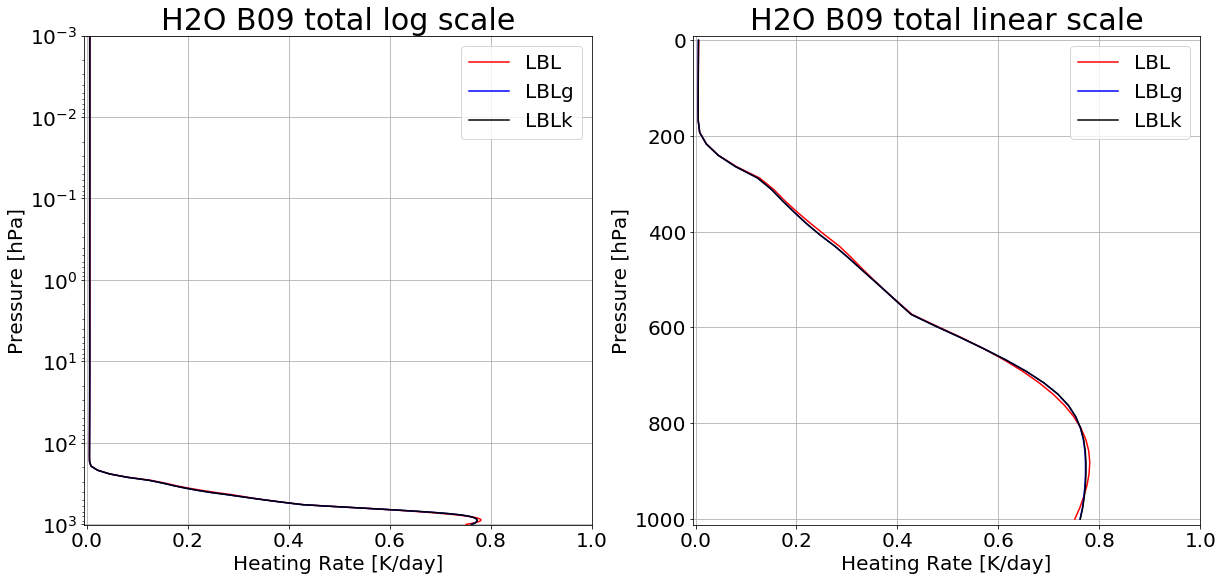

In [29]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,1.0,1013,0.001])
plt.grid()
plt.title('H2O B09 total log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_tot'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_tot'],htr['hPa'],label='LBLk',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,1.0,1013,-10])
plt.grid()
plt.title('H2O B09 total linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_tot'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['LBLk_tot'],htr['hPa'],label='LBLk',color='black')
plt.legend()

plt.show()

In [44]:
htr = pd.read_table(path+'heat_all.dat',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                      names=['hPa','LBL_g1','LBLg_g1','LBLk_g1','LBL_g2','LBLg_g2','LBLk_g2','LBL_g3','LBLg_g3','LBLk_g3'
                            ,'LBL_g4','LBLg_g4','LBLk_g4','LBL_g5','LBLg_g5','LBLk_g5','LBL_g6','LBLg_g6','LBLk_g6'
                            ,'LBL_g7','LBLg_g7','LBLk_g7','LBL_g8','LBLg_g8','LBLk_g8','LBL_g9','LBLg_g9','LBLk_g9'
                            ,'LBL_g10','LBLg_g10','LBLk_g10'
                            ,'LBL_tot','LBLg_tot','LBLk_tot'])

## save heating rate to excel for lbl
sav = pd.DataFrame(htr)
sav.to_csv(fname+"heat_all.csv",header=True,index=False)
fn = fname+'heat_all.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

In [45]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')